In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

In [12]:
# Load the images
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename), cv2.IMREAD_GRAYSCALE)
        img=cv2.resize(img,(100,100))
        if img is not None:
            images.append(img)
    return images

In [3]:
# Calculate the mean image
def get_mean_image(images):
    mean_image = np.zeros(images[0].shape, dtype=np.float64)
    for image in images:
        mean_image += image/len(images)
    return mean_image

In [4]:
# Calculate the covariance matrix
def get_covariance_matrix(images, mean_image):
    matrix = np.zeros((len(images[0].ravel()), len(images[0].ravel())), dtype=np.float64)
    for image in images:
        matrix += np.outer((image-mean_image).ravel(), (image-mean_image).ravel())
    return matrix

In [5]:
# Calculate the eigenvectors and eigenvalues
def get_eigen_vectors(matrix):
    eigen_values, eigen_vectors = np.linalg.eig(matrix)
    return eigen_values, eigen_vectors

In [6]:

# Project the images onto the eigenvectors
def project_images(images, eigen_vectors):
    features = np.zeros((len(images), len(eigen_vectors)), dtype=np.float64)
    for i, image in enumerate(images):
        features[i] = np.dot(eigen_vectors.T, (image-mean_image).ravel())
    return features

In [7]:

# Reconstruct the original images
def reconstruct_images(features, eigen_vectors, mean_image):
    images = np.zeros((len(features), mean_image.shape[0]*mean_image.shape[1]), dtype=np.float64)
    for i, feature in enumerate(features):
        images[i] = mean_image.ravel() + np.dot(eigen_vectors, feature).ravel()
    return images

In [8]:

# Calculate the similarity score between two images
def get_similarity_score(image1, image2):
    return np.dot(image1.ravel(), image2.ravel())

In [14]:
# Load the training images
train_folder = 'all images'
train_images = load_images_from_folder(train_folder)

In [15]:
# Calculate the mean image
mean_image = get_mean_image(train_images)

In [16]:

# Calculate the covariance matrix
matrix = get_covariance_matrix(train_images, mean_image)

In [17]:

# Calculate the eigenvectors and eigenvalues
eigen_values, eigen_vectors = get_eigen_vectors(matrix)

In [18]:


# Sort the eigenvectors by eigenvalues
sorted_indexes = eigen_values.argsort()[::-1]
eigen_values = eigen_values[sorted_indexes]
eigen_vectors = eigen_vectors[:, sorted_indexes]

In [19]:

# Project the training images onto the eigenvectors
train_features = project_images(train_images, eigen_vectors)

/iitjhome/kumar281/.local/lib/python3.7/site-packages/ipykernel_launcher.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  """


In [38]:

# Load the test images
test_folder = 'test_image'
test_images = load_images_from_folder(test_folder)
print(len(test_images))

4


In [39]:

# Project the test images onto the eigenvectors
test_features = project_images(test_images, eigen_vectors)

/iitjhome/kumar281/.local/lib/python3.7/site-packages/ipykernel_launcher.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  """


Test image 1 matches with training image 593 with a similarity score of 25814070.82
(100, 100)
(100, 100)


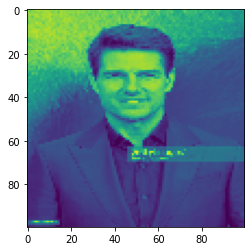

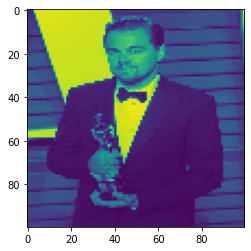

Test image 2 matches with training image 289 with a similarity score of 46960031.18
(100, 100)
(100, 100)


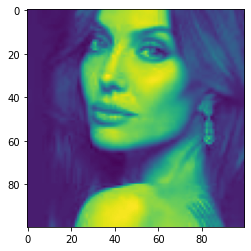

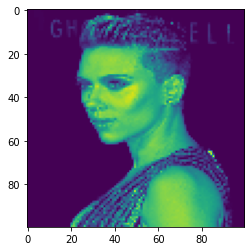

Test image 3 matches with training image 1260 with a similarity score of 26082529.79
(100, 100)
(100, 100)


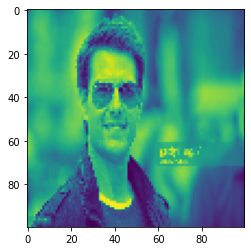

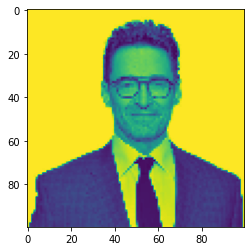

Test image 4 matches with training image 380 with a similarity score of 31578836.80
(100, 100)
(100, 100)


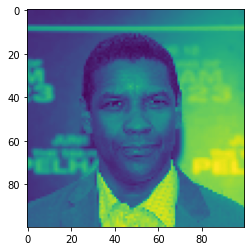

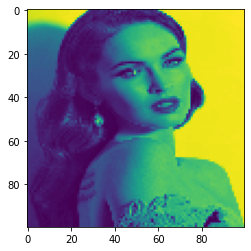

In [40]:


# Match each test image to the closest training image
for i, test_feature in enumerate(test_features):
    max_score = -np.inf
    max_index = -1
    for j, train_feature in enumerate(train_features):
        score = get_similarity_score(test_feature, train_feature)
        if score > max_score:
            max_score = score
            max_index = j
    #print(f'Test image {i+1} matches with training image {max_index+1} with a similarity score of {max_score:.2f}')
    # test_image = cv2.imread(os.path.join(test_folder, test_images[i]))
    # train_image = cv2.imread(os.path.join(train_folder, train_images[max_index]))
    test_image=test_images[i]
    train_image=train_images[max_index]
    #print(test_image.shape)
    #print(train_image.shape)

    plt.imshow( test_image)
    plt.show()
    plt.imshow(train_image)
    plt.show()
